Part 1: Data Exploration and Preprocessing
   6  148  72  35    0  33.6  0.627  50  1
0  1   85  66  29    0  26.6  0.351  31  0
1  8  183  64   0    0  23.3  0.672  32  1
2  1   89  66  23   94  28.1  0.167  21  0
3  0  137  40  35  168  43.1  2.288  33  1
4  5  116  74   0    0  25.6  0.201  30  0

empty count: 0

duplicate count: 0

Correlation matrix:               6       148        72        35         0      33.6     0.627  \
6      1.000000  0.128846  0.141197 -0.082495 -0.072999  0.017518 -0.033927   
148    0.128846  1.000000  0.152498  0.056381  0.332383  0.220955  0.136903   
72     0.141197  0.152498  1.000000  0.207308  0.089098  0.281777  0.041180   
35    -0.082495  0.056381  0.207308  1.000000  0.437974  0.392553  0.183498   
0     -0.072999  0.332383  0.089098  0.437974  1.000000  0.198111  0.185579   
33.6   0.017518  0.220955  0.281777  0.392553  0.198111  1.000000  0.140546   
0.627 -0.033927  0.136903  0.041180  0.183498  0.185579  0.140546  1.000000   
50     0.5

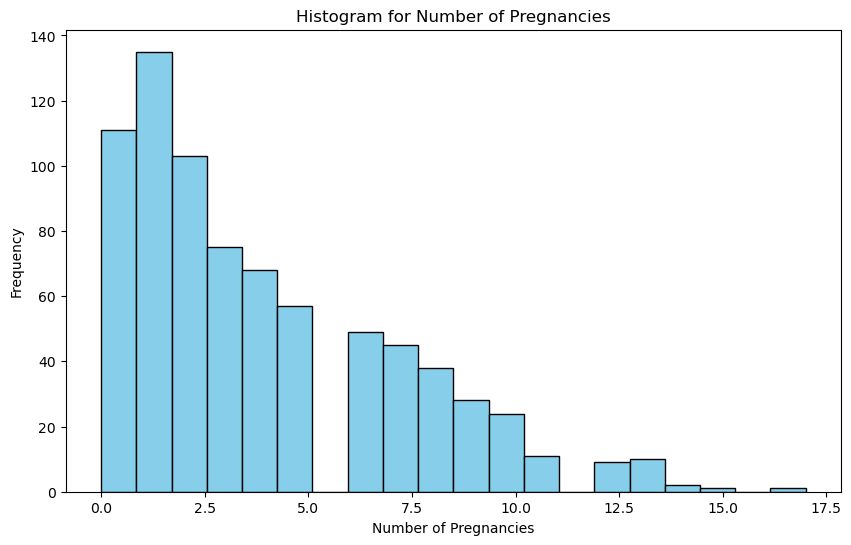

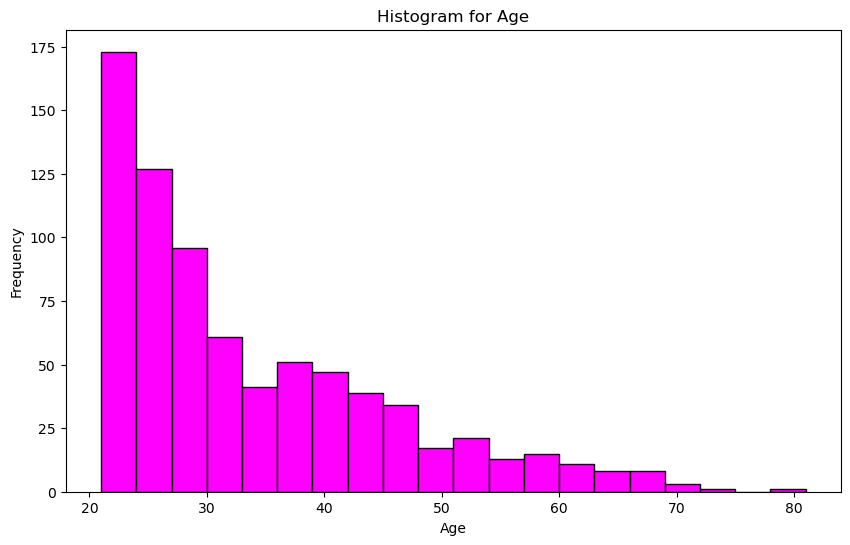

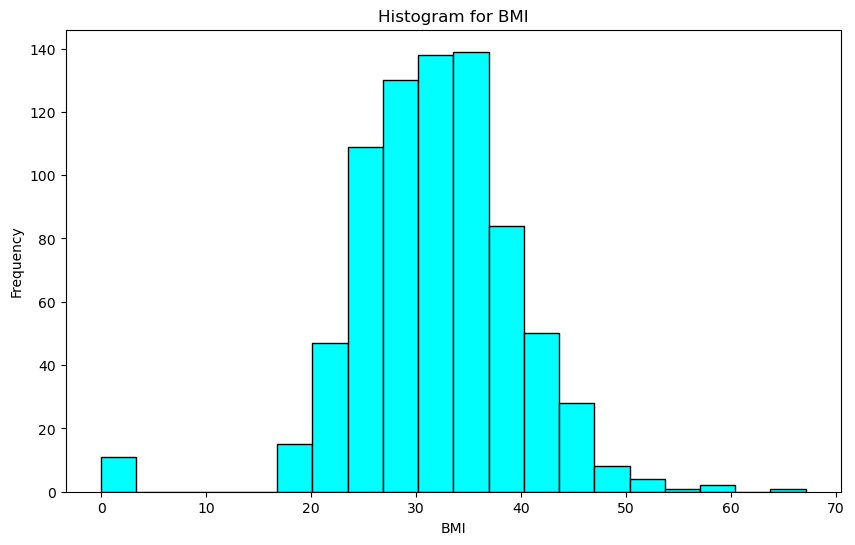

In [26]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

print('Part 1: Data Exploration and Preprocessing')

#1.1: Read and load data into Python
import pandas as pd
df = pd.read_csv('pima-indians-diabetes.csv')
print(df.head())

#1.2: Explore the dataset
empty_count = df.isnull().sum().sum()
print('\nempty count:', empty_count)

dup_count = df.duplicated().sum()
print('\nduplicate count:', dup_count)

corr_matrix = df.corr()
print('\nCorrelation matrix:', corr_matrix)

# histograms
plt.figure(figsize=(10, 6))
plt.hist(df.iloc[:, 0], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram for Number of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df.iloc[:, 7], bins=20, color='magenta', edgecolor='black')
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df.iloc[:, 5], bins=20, color='cyan', edgecolor='black')
plt.title('Histogram for BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

print('Part 2: Build a Baseline Model')

# 3: Split the data to training and testing dataset
X = normalized_df.iloc[:, :-1]
y = normalized_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 4: Build the baseline model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

print('\nTotal number of parameters in the model:', model.count_params())
print()
model.summary()

# 5: Train model with 20 epochs
model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

Part 2: Build a Baseline Model

Total number of parameters in the model: 121

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 12)                108       
                                                                 
 dense_17 (Dense)            (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20


5/5 [==============================] - 1s 35ms/step - loss: 0.6864 - accuracy: 0.5878 - val_loss: 0.6844 - val_accuracy: 0.6302
Epoch 2/20
5/5 [==============================] - 0s 8ms/step - loss: 0.6816 - accuracy: 0.6296 - val_loss: 0.6808 - val_accuracy: 0.6302
Epoch 3/20
5/5 [==============================] - 0s 7

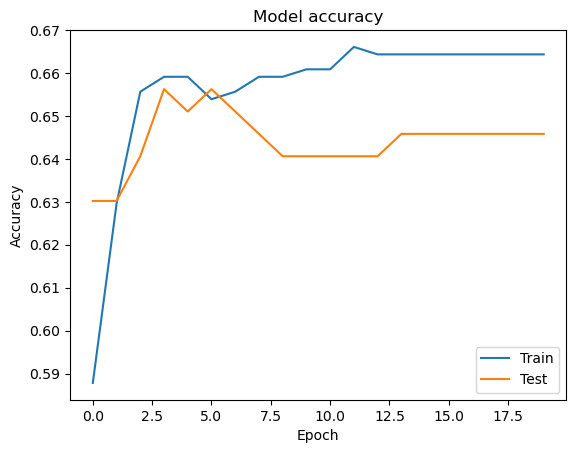

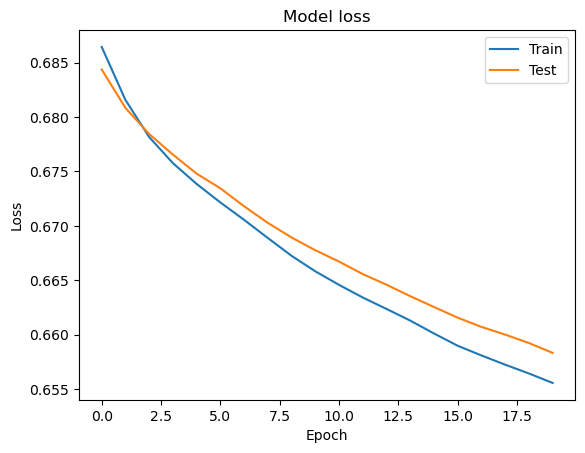

In [48]:
# 6: Graph the trajectory of the loss functions, accuracy on both train and test set
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [51]:
# 7: Evaluate and interpret the accuracy and loss performance during training, and testing
model.evaluate(X_test, y_test)

print('\nThe model achieved 64.58% accuracy. This is not very accurate and indicates that there is room for improvement. Similarly, a loss of 65.83% indicates that the model is far off from the actual values.')

6/6 [==============================] - 0s 800us/step - loss: 0.6583 - accuracy: 0.6458

The model achieved 64.58% accuracy. This is not very accurate and indicates that there is room for improvement. Similarly, a loss of 65.83% indicates that the model is far off from the actual values.


Part 3: Find the Best Model

Training Model 1


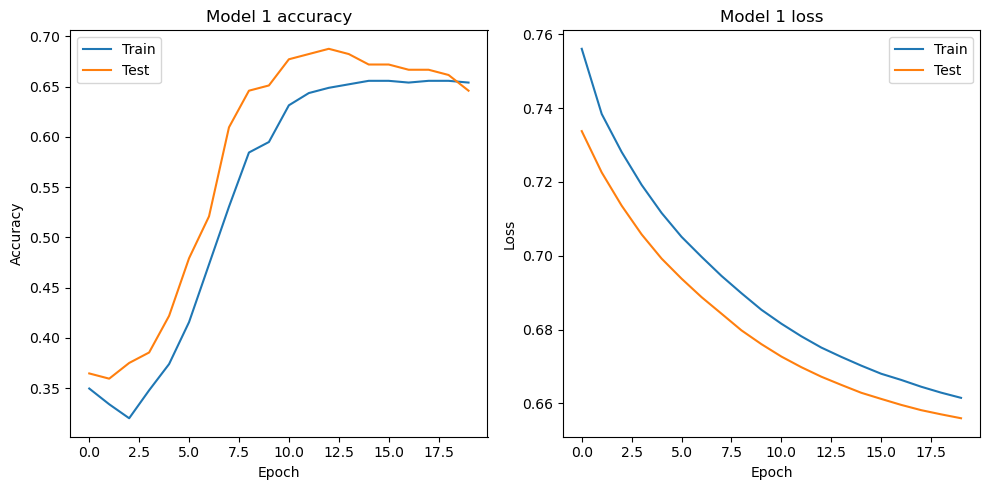

6/6 [==============================] - 0s 1ms/step
Model 0: AUC = 0.4610, Accuracy = 0.6458, Loss = 0.6560

Training Model 2


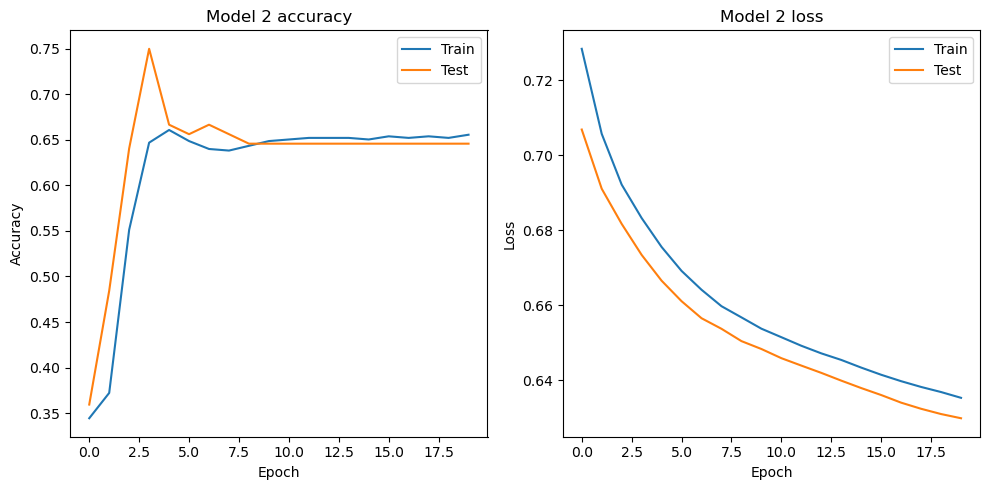

6/6 [==============================] - 0s 825us/step
Model 1: AUC = 0.6931, Accuracy = 0.6458, Loss = 0.6298

Training Model 3


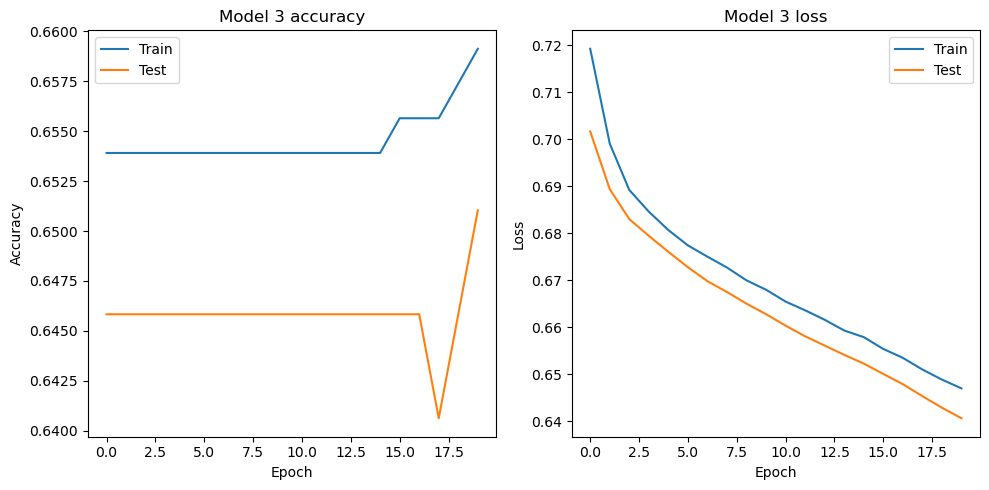

6/6 [==============================] - 0s 904us/step
Model 2: AUC = 0.6223, Accuracy = 0.6510, Loss = 0.6407

Training Model 4


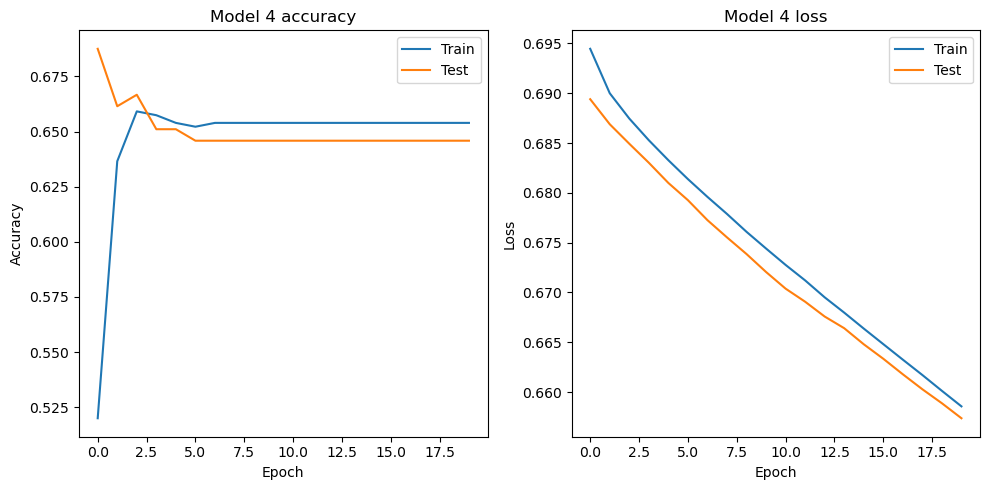

6/6 [==============================] - 0s 1ms/step
Model 3: AUC = 0.7329, Accuracy = 0.6458, Loss = 0.6574



In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

print('Part 3: Find the Best Model\n')

# Making 4 different models
model1 = Sequential()
model1.add(Dense(15, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))

model2 = Sequential()
model2.add(Dense(24, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(1, activation='sigmoid'))

model3 = Sequential()
model3.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(6, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model4 = Sequential()
model4.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dense(6, activation='relu'))
model4.add(Dense(3, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

models = [model1, model2, model3, model4]

for i in range(len(models)):
    model = models[i]
    print(f'Training Model {i + 1}')
    model.compile(loss='binary_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=0)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Test')
    plt.title(f'Model {i + 1} accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Test')
    plt.title(f'Model {i + 1} loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    y_pred_proba = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred_proba)

    print("Model " + str(i) + ": AUC = " + "{:.4f}".format(auc) + ", Accuracy = " + "{:.4f}".format(accuracy) + ", Loss = " + "{:.4f}".format(loss) + "\n")


In [70]:
print('Based on the performance metrics of the 4 models, I concluded that model 4 would be the best performing. It achieved the highest AUC score of 0.7329, indicating that it correctly identified between diabetes and non-diabetes more often than other models. This makes it the best because it is most capable of generating accurate predictions')
model4.save_weights('best_model')

Based on the performance metrics of the 4 models, I concluded that model 4 would be the best performing. It achieved the highest AUC score of 0.7329, indicating that it correctly identified between diabetes and non-diabetes more often than other models. This makes it the best because it is most capable of generating accurate predictions
